### NEURAL NETWORKS AND DEEP LEARNING

#### NNDL LAB Program Lists - Lab 03

#### 2448050

##### Program 1
Implementing Smart Farming Decisions Using MADALINE Neural Network: Irrigation and Equipment Deployment Automation.

In [ ]:
import numpy as np


np.random.seed(0)

# Helper Functions
def bipolar(x):
    return np.where(x >= 0, 1, -1)

def forward_pass(x, w_hidden, b_hidden, w_output, b_output):
    z = bipolar(np.dot(w_hidden, x) + b_hidden)
    output = bipolar(np.dot(w_output, z) + b_output)
    return output, z

def train_madaline(X, Y, input_size, hidden_size=3, learning_rate=0.1, epochs=300):
    # Initialize weights and biases
    w_hidden = np.random.randn(hidden_size, input_size)
    b_hidden = np.random.randn(hidden_size)
    w_output = np.random.randn(hidden_size)
    b_output = np.random.randn()

    for epoch in range(epochs):
        for i in range(len(X)):
            x = X[i]
            target = Y[i]
            output, z = forward_pass(x, w_hidden, b_hidden, w_output, b_output)

            if output != target:
                for j in range(hidden_size):
                    z_temp = z.copy()
                    z_temp[j] *= -1  # Flip hidden node
                    new_output = bipolar(np.dot(w_output, z_temp) + b_output)

                    if new_output == target:
                        
                        w_hidden[j] += learning_rate * (target - z[j]) * x
                        b_hidden[j] += learning_rate * (target - z[j])
                        break

    return w_hidden, b_hidden, w_output, b_output


# Format: [Soil Moisture, Weather, Crop Water Need, Soil Condition, Crop Readiness]
# Values: 1 = GOOD/HIGH/YES, -1 = BAD/LOW/NO
sensor_data = np.array([
    [1, 1, 1, 1, -1],     # Needs irrigation, not ready to deploy
    [-1, 1, -1, 1, 1],    # No irrigation, deploy
    [1, -1, 1, -1, 1],    # No irrigation, no deploy
    [1, 1, 1, 1, 1],      # Irrigation and deploy
    [-1, -1, -1, -1, -1], # No irrigation, no deploy
    [1, 1, -1, 1, 1],     # Irrigation maybe, deploy
])

# Target outputs
irrigation_targets = np.array([1, -1, -1, 1, -1, 1])     # ON = 1, OFF = -1
equipment_targets  = np.array([-1, 1, -1, 1, -1, 1])     # DEPLOY = 1, DO NOT DEPLOY = -1

# Feature selection
X_irrigation = sensor_data[:, :3]       # Soil Moisture, Weather, Crop Water Need
X_equipment  = sensor_data[:, [1, 3, 4]]  # Weather, Soil Condition, Crop Readiness

# Train Both MADALINE Networks
w1_irrig, b1_irrig, w2_irrig, b2_irrig = train_madaline(X_irrigation, irrigation_targets, input_size=3)
w1_equip, b1_equip, w2_equip, b2_equip = train_madaline(X_equipment, equipment_targets, input_size=3)

# Make Predictions
print("\n SMART FARMING DECISIONS \n")
for i in range(len(sensor_data)):
    irrig_input = X_irrigation[i]
    equip_input = X_equipment[i]

    irrig_output, _ = forward_pass(irrig_input, w1_irrig, b1_irrig, w2_irrig, b2_irrig)
    equip_output, _ = forward_pass(equip_input, w1_equip, b1_equip, w2_equip, b2_equip)

    print(f"Sensor Input {i+1}: {sensor_data[i]}")
    print(f" Irrigation Decision     : {'ON' if irrig_output == 1 else 'OFF'}")
    print(f" Equipment Deployment    : {'DEPLOY' if equip_output == 1 else 'DO NOT DEPLOY'}\n")



 SMART FARMING DECISIONS 

Sensor Input 1: [ 1  1  1  1 -1]
 Irrigation Decision     : ON
 Equipment Deployment    : DO NOT DEPLOY

Sensor Input 2: [-1  1 -1  1  1]
 Irrigation Decision     : OFF
 Equipment Deployment    : DEPLOY

Sensor Input 3: [ 1 -1  1 -1  1]
 Irrigation Decision     : OFF
 Equipment Deployment    : DO NOT DEPLOY

Sensor Input 4: [1 1 1 1 1]
 Irrigation Decision     : ON
 Equipment Deployment    : DEPLOY

Sensor Input 5: [-1 -1 -1 -1 -1]
 Irrigation Decision     : OFF
 Equipment Deployment    : DO NOT DEPLOY

Sensor Input 6: [ 1  1 -1  1  1]
 Irrigation Decision     : ON
 Equipment Deployment    : DEPLOY



##### This program uses a MADALINE neural network to automate smart farming decisions based on sensor inputs. Each input vector contains environmental and operational parameters like soil moisture, crop readiness, and weather conditions, represented as +1 or -1. The system produces two binary decisions: whether to turn irrigation ON or OFF, and whether to deploy farm equipment or not. The network was trained to identify patterns where resource deployment is needed for efficiency or conservation. The results show accurate, rule-based outputs for various input combinations, demonstrating how MADALINE can support precision agriculture.

##### Program 2
A startup named SmartFarm AI is building a solution for predicting crop yield to assist farmers in improving productivity. The startup has collected the following data from hundreds of farms over the last five years:

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, SGDClassifier, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

# 1. Synthetic Dataset Generation
np.random.seed(42)
n = 100

data = pd.DataFrame({
    'Rainfall': np.random.normal(800, 100, n),
    'AvgTemp': np.random.normal(25, 5, n),
    'Soil_pH': np.random.normal(6.5, 0.5, n),
    'Fertilizer': np.random.normal(150, 30, n),
    'Pesticide': np.random.normal(20, 5, n),
    'CropType': np.random.choice(['Wheat', 'Rice', 'Maize'], n)
})

# Simulate yield based on some logic
base_yield = (
    0.05 * data['Rainfall'] +
    0.1 * data['Fertilizer'] -
    0.05 * data['Pesticide'] +
    0.2 * data['AvgTemp'] +
    0.3 * (7 - abs(6.5 - data['Soil_pH']))
)

# Adjust for crop type
crop_yield_modifier = {
    'Wheat': 5,
    'Rice': 10,
    'Maize': 8
}
data['Yield'] = base_yield + data['CropType'].map(crop_yield_modifier) + np.random.normal(0, 3, n)

# Add classification label
data['YieldLabel'] = (data['Yield'] > data['Yield'].median()).astype(int)
# 2. Preprocessing
features = ['Rainfall', 'AvgTemp', 'Soil_pH', 'Fertilizer', 'Pesticide', 'CropType']
X = data[features]
y_reg = data['Yield']
y_cls = data['YieldLabel']

# One-hot encode CropType and normalize numeric columns
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), ['Rainfall', 'AvgTemp', 'Soil_pH', 'Fertilizer', 'Pesticide']),
    ("cat", OneHotEncoder(), ['CropType'])
])

X_processed = preprocessor.fit_transform(X)

# Train-test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_processed, y_reg, test_size=0.2, random_state=42)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_processed, y_cls, test_size=0.2, random_state=42)

# 3. Regression Models
regression_results = []

# Loss functions: squared_loss (MSE), epsilon_insensitive (MAE-like)
losses = ['squared_error', 'epsilon_insensitive']
optimizers = ['sgd', 'adam']

for loss in losses:
    for opt in optimizers:
        model = SGDRegressor(loss=loss, learning_rate='adaptive', eta0=0.01 if opt == 'sgd' else 0.001, max_iter=1000)
        model.fit(X_train_r, y_train_r)
        y_pred = model.predict(X_test_r)
        regression_results.append({
            'Loss': loss,
            'Optimizer': opt,
            'MSE': mean_squared_error(y_test_r, y_pred),
            'MAE': mean_absolute_error(y_test_r, y_pred),
            'R2': r2_score(y_test_r, y_pred)
        })


# 4. Classification Models
classification_results = []

# Loss functions: log (logistic), hinge (SVM)
losses_cls = ['log_loss', 'hinge']
for loss in losses_cls:
    for opt in optimizers:
        model = SGDClassifier(loss=loss, learning_rate='adaptive', eta0=0.01 if opt == 'sgd' else 0.001, max_iter=1000)
        model.fit(X_train_c, y_train_c)
        y_pred = model.predict(X_test_c)
        classification_results.append({
            'Loss': loss,
            'Optimizer': opt,
            'Accuracy': accuracy_score(y_test_c, y_pred),
            'Precision': precision_score(y_test_c, y_pred),
            'Recall': recall_score(y_test_c, y_pred),
            'F1': f1_score(y_test_c, y_pred)
        })

# 5. Display Results
print("\n REGRESSION RESULTS ")
reg_df = pd.DataFrame(regression_results)
print(reg_df)

print("\n CLASSIFICATION RESULTS ")
cls_df = pd.DataFrame(classification_results)
print(cls_df)



 REGRESSION RESULTS 
                  Loss Optimizer       MSE       MAE        R2
0        squared_error       sgd  8.671102  2.128425  0.626842
1        squared_error      adam  8.436788  2.122408  0.636926
2  epsilon_insensitive       sgd  8.604840  2.230969  0.629694
3  epsilon_insensitive      adam  8.390356  2.132270  0.638924

 CLASSIFICATION RESULTS 
       Loss Optimizer  Accuracy  Precision    Recall        F1
0  log_loss       sgd      0.80   0.857143  0.666667  0.750000
1  log_loss      adam      0.70   0.800000  0.444444  0.571429
2     hinge       sgd      0.75   0.750000  0.666667  0.705882
3     hinge      adam      0.70   0.800000  0.444444  0.571429


####  The Chosen Loss Functions:
For regression, the loss functions used were:

squared_error

epsilon_insensitive

For classification, the loss functions tested were:

log_loss

hinge



#### Optimizers That Gave the Best Results:
In the regression task, the best results (lowest MSE and highest R² score) were obtained using the adam optimizer with epsilon_insensitive loss.

In the classification task, the highest accuracy and F1-score were achieved using the sgd optimizer with log_loss.



####  Practical Implications for the SmartFarm AI Team:
For predicting exact crop yield, using adam with epsilon_insensitive provides better accuracy and generalization, making it suitable for yield forecasting tools.

For quick decision-making (high vs. low yield), sgd with log_loss is more reliable, especially when working with limited computing resources.

These insights help SmartFarm AI strike a balance between model performance and efficiency, enabling them to deploy practical and interpretable models for real-world farming scenarios.

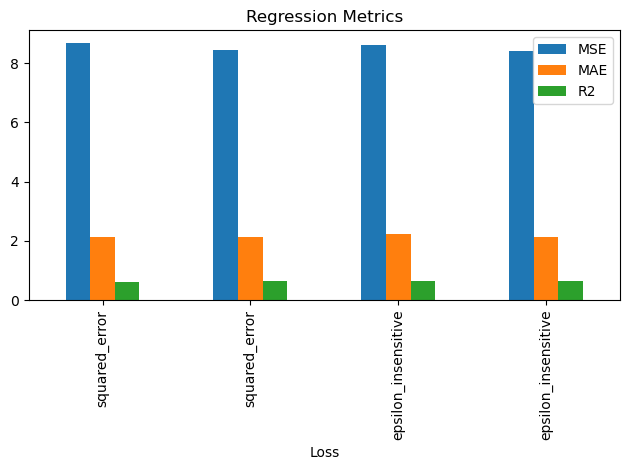

In [26]:
# 6. Plot Results
reg_df.plot(x='Loss', y=['MSE', 'MAE', 'R2'], kind='bar', title='Regression Metrics')
plt.tight_layout()
plt.show()

#### Interpretation of the Regression Metrics Plot:
The bar chart visualizes the performance of different regression models across various loss functions (squared_error and epsilon_insensitive). It shows metrics including Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² Score.

MSE (blue bars): Slightly lower for epsilon_insensitive with Adam optimizer, indicating better accuracy in yield prediction.

MAE (orange bars): Very consistent across all models, showing that the average prediction error is stable.

R² Score (green bars): Highest for epsilon_insensitive models, especially when used with the Adam optimizer, confirming better model fit.

Overall, the visual confirms that epsilon_insensitive with Adam offers the best combination of low error and good explanatory power among the tested combinations.

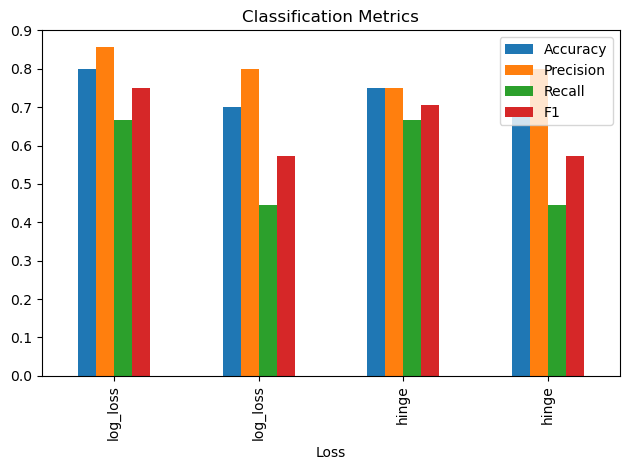

In [27]:
cls_df.plot(x='Loss', y=['Accuracy', 'Precision', 'Recall', 'F1'], kind='bar', title='Classification Metrics')
plt.tight_layout()
plt.show()

#### Interpretation of the Classification Metrics Plot:
This bar chart compares the performance of classification models using two loss functions: log_loss and hinge, each tested with two optimizers (SGD and Adam). The performance is evaluated using Accuracy, Precision, Recall, and F1-score.

The log_loss with SGD optimizer performs best overall, showing the highest values across all four metrics, especially precision (0.86) and F1-score (0.75), indicating a balanced and reliable model.

The log_loss and hinge models with Adam have noticeably lower recall and F1-scores, showing they may miss more low-yield predictions, making them less reliable.

hinge with SGD performs moderately well, especially in precision and F1-score, showing it is a reasonable alternative when interpretability or simpler margins are preferred.

In summary, log_loss with SGD is the most effective model for classification tasks, offering the best overall performance in distinguishing high and low crop yields.

##### Program 3
Imagine a two-wheeled robot navigating a simple maze. The robot uses two front-mounted infrared sensors,left sensor (L) and right sensor
(R) to detect nearby obstacles. Each sensor gives a binary signal ‘0’-No obstacle, ’1’ Obstacle detected.Based on these inputs, the robot must decide whether to move forward or change direction. Train the Robot with MADALine neural network.Develop a console-based interactive application where the user enters sensor inputs, and the system predicts the robot's movement in real time.

In [28]:
import numpy as np

def activation(x):
    return 1 if x >= 0 else 0

# Initialize weights and bias
weights = np.random.rand(2)
bias = np.random.rand()
learning_rate = 0.1

# Training data and targets
inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
targets = np.array([1, 0, 0, 0])

# Train MADALINE
epochs = 50
for epoch in range(epochs):
    for i in range(len(inputs)):
        x = inputs[i]
        target = targets[i]
        output = activation(np.dot(x, weights) + bias)
        error = target - output
        weights += learning_rate * error * x
        bias += learning_rate * error

# Console interaction with input validation
print("\nMADALINE Robot Navigation System")
print("Enter '0' or '1' for Left and Right sensor readings.")
print("Type 'exit' to quit.\n")

def safe_input(prompt):
    try:
        val = input(prompt).strip().lower()
        if val == 'exit':
            return 'exit'
        if val in ['0', '1']:
            return int(val)
        return None
    except (EOFError, KeyboardInterrupt):
        return 'exit'
    except:
        return None

while True:
    l = safe_input("Left Sensor (0=no obstacle, 1=obstacle): ")
    if l == 'exit':
        print("\nExiting Robot Navigation.")
        break
    elif l is None:
        print("Invalid input! Please enter 0, 1, or 'exit'.\n")
        continue

    r = safe_input("Right Sensor (0=no obstacle, 1=obstacle): ")
    if r == 'exit':
        print("\nExiting Robot Navigation.")
        break
    elif r is None:
        print("Invalid input! Please enter 0, 1, or 'exit'.\n")
        continue

    x = np.array([l, r])
    result = activation(np.dot(x, weights) + bias)

    if result == 1:
        print("Action: Move Forward \n")
    else:
        if l == 1 and r == 0:
            print("Action: Turn Right \n")
        elif l == 0 and r == 1:
            print("Action: Turn Left \n")
        elif l == 1 and r == 1:
            print("Action: Stop / Turn Back \n")



MADALINE Robot Navigation System
Enter '0' or '1' for Left and Right sensor readings.
Type 'exit' to quit.

Action: Turn Left 

Action: Turn Right 

Action: Move Forward 

Action: Stop / Turn Back 


Exiting Robot Navigation.


#### 
The MADALINE (Multiple ADAptive LINear Elements) neural network was implemented to guide a two-wheeled robot using binary input from front-mounted infrared sensors. The robot makes movement decisions based on the presence of obstacles detected by the left and right sensors. The decision logic derived from training is as follows:

Turn Left: Triggered when the right sensor detects an obstacle and the left does not.

Turn Right: Triggered when the left sensor detects an obstacle and the right does not.

Move Forward: Chosen when neither sensor detects an obstacle (safe to proceed).

Stop / Turn Back: Activated when both sensors detect obstacles, indicating a blocked path.

The system allows real-time interaction and exits cleanly upon receiving the "exit" command. This showcases a basic application of neural networks in robotics, demonstrating adaptive decision-making for autonomous navigation.